🚀 INICIANDO ANÁLISE DE CONVERGÊNCIA DE AVALIADORES
📁 Arquivo: resultados_agrupamento/GRUPOS_FINAL_FILTRADO.csv
📊 Dados carregados: 27,201 projetos da LLM
🏢 Setores únicos: 7
🔗 Grupos únicos: 6313
📈 ANÁLISE EXPLORATÓRIA BÁSICA

🏭 Distribuição de projetos por setor:
   TIC: 7,485 projetos (27.5%)
   Química e Farmácia: 4,698 projetos (17.3%)
   Transversal: 3,591 projetos (13.2%)
   Mecânica e Transporte: 3,154 projetos (11.6%)
   Agroindústria e Alimentos: 2,760 projetos (10.1%)
   Eletroeletrônica: 2,662 projetos (9.8%)
   Metalurgia e Mineração: 2,357 projetos (8.7%)

⚖️ Distribuição de avaliações:
   Recomendado: 16,899 (62.1%)
   Não Recomendado: 9,808 (36.1%)

👥 Estatísticas de tamanho dos grupos:
   Grupos com 2+ projetos: 5,319
   Tamanho médio: 4.3 projetos
   Maior grupo: 568 projetos

🎯 IDENTIFICAÇÃO DE GRUPOS COM DIVERGÊNCIA
🔍 Encontrados 2042 grupos com divergência
📊 Total de projetos divergentes: 18420

🏆 Top 10 grupos com maior divergência:
   Grupo 291_nan (Metalurgia e M

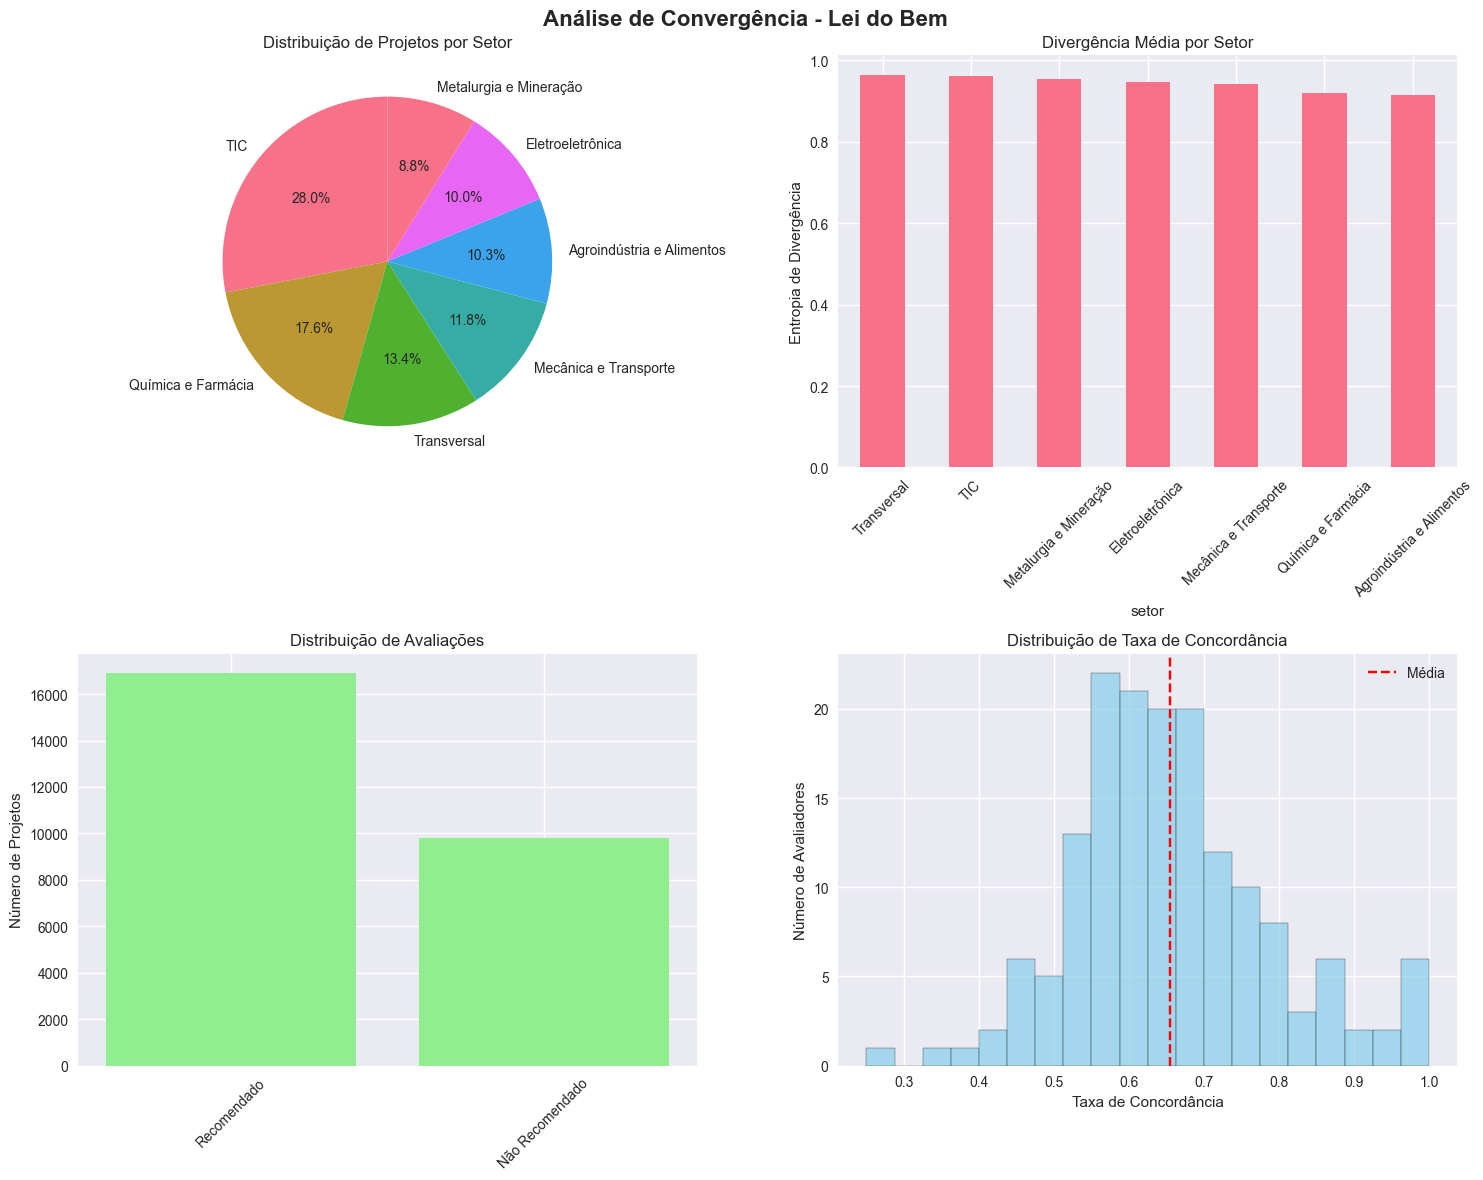


📋 RELATÓRIO FINAL - RESPOSTAS ÀS PERGUNTAS ESPECÍFICAS

1️⃣ SETORES COM MAIOR DIVERGÊNCIA:
----------------------------------------
Os setores ordenados por divergência são:
   1º Transversal
      • 286 grupos divergentes
      • 2268 projetos com divergência
      • Divergência média: 0.964
   2º TIC
      • 686 grupos divergentes
      • 5392 projetos com divergência
      • Divergência média: 0.962
   3º Metalurgia e Mineração
      • 117 grupos divergentes
      • 2022 projetos com divergência
      • Divergência média: 0.954
   4º Eletroeletrônica
      • 230 grupos divergentes
      • 1855 projetos com divergência
      • Divergência média: 0.948
   5º Mecânica e Transporte
      • 220 grupos divergentes
      • 2181 projetos com divergência
      • Divergência média: 0.942

🥇 SETOR MAIS PROBLEMÁTICO: Transversal


2️⃣ AVALIADORES COM MAIOR CONCORDÂNCIA:
---------------------------------------------
Top 5 avaliadores com maior taxa de concordância:
   1º Avaliador 127789240.0
 

In [11]:
# %% [markdown]
# # Análise de Convergência de Avaliadores - Projetos Lei do Bem
# 
# Esta análise explora padrões de divergência nas avaliações de projetos similares agrupados por IA,
# focando em identificar setores problemáticos e perfis de bons avaliadores.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# %%
# Carregamento e preparação inicial dos dados
def carregar_dados(arquivo_csv):
    """
    Carrega dados do CSV e realiza limpeza básica
    """
    df = pd.read_csv(arquivo_csv, sep=';', encoding='utf-8')
    
    # Filtrar apenas grupos da LLM conforme solicitado
    df_llm = df[df['origem_agrupamento'] == 'LLM'].copy()
    
    # Criar campo grupo_id como concatenação de grupo_id_final e sublote
    df_llm['grupo_id'] = df_llm['grupo_id_final'].astype(str) + '_' + df_llm['sublote'].astype(str)
    
    print(f"📊 Dados carregados: {len(df_llm):,} projetos da LLM")
    print(f"🏢 Setores únicos: {df_llm['setor'].nunique()}")
    print(f"🔗 Grupos únicos: {df_llm['grupo_id'].nunique()}")
    
    return df_llm

# %%
# CHUNK 1: Análise Exploratória Básica
def analise_exploratoria(df_llm):
    """
    Realiza análise exploratória dos dados
    """
    print("=" * 60)
    print("📈 ANÁLISE EXPLORATÓRIA BÁSICA")
    print("=" * 60)
    
    # Distribuição por setor
    print("\n🏭 Distribuição de projetos por setor:")
    dist_setor = df_llm['setor'].value_counts()
    for setor, count in dist_setor.items():
        print(f"   {setor}: {count:,} projetos ({count/len(df_llm)*100:.1f}%)")
    
    # Distribuição de avaliações
    print(f"\n⚖️ Distribuição de avaliações:")
    dist_aval = df_llm['do_resultado_analise'].value_counts()
    for resultado, count in dist_aval.items():
        print(f"   {resultado}: {count:,} ({count/len(df_llm)*100:.1f}%)")
    
    # Tamanhos de grupos
    tamanhos_grupos = df_llm.groupby('grupo_id').size()
    print(f"\n👥 Estatísticas de tamanho dos grupos:")
    print(f"   Grupos com 2+ projetos: {(tamanhos_grupos >= 2).sum():,}")
    print(f"   Tamanho médio: {tamanhos_grupos.mean():.1f} projetos")
    print(f"   Maior grupo: {tamanhos_grupos.max()} projetos")
    
    return dist_setor, dist_aval, tamanhos_grupos

# %%
# CHUNK 2: Identificação de Grupos com Divergência
def identificar_grupos_divergentes(df_llm):
    """
    Identifica grupos onde há divergência de avaliação entre projetos similares
    """
    print("\n" + "=" * 60)
    print("🎯 IDENTIFICAÇÃO DE GRUPOS COM DIVERGÊNCIA")
    print("=" * 60)
    
    # Filtrar apenas grupos com 2+ projetos
    grupos_multiplos = df_llm.groupby('grupo_id').filter(lambda x: len(x) >= 2)
    
    # Calcular divergência por grupo
    divergencia_por_grupo = []
    
    for grupo_id, grupo_df in grupos_multiplos.groupby('grupo_id'):
        avaliacoes = grupo_df['do_resultado_analise'].value_counts()
        total_projetos = len(grupo_df)
        
        # Se há mais de um tipo de avaliação, há divergência
        if len(avaliacoes) > 1:
            # Calcular grau de divergência (entropia normalizada)
            proporcoes = avaliacoes / total_projetos
            entropia = -sum(p * np.log2(p) for p in proporcoes)
            entropia_normalizada = entropia / np.log2(len(avaliacoes)) if len(avaliacoes) > 1 else 0
            
            divergencia_por_grupo.append({
                'grupo_id': grupo_id,
                'setor': grupo_df['setor'].iloc[0],
                'total_projetos': total_projetos,
                'tipos_avaliacao': len(avaliacoes),
                'entropia_divergencia': entropia_normalizada,
                'avaliacoes_detalhes': dict(avaliacoes),
                'avaliadores': list(grupo_df['do_id_at'].unique())
            })
    
    df_divergencia = pd.DataFrame(divergencia_por_grupo)
    
    if len(df_divergencia) > 0:
        print(f"🔍 Encontrados {len(df_divergencia)} grupos com divergência")
        print(f"📊 Total de projetos divergentes: {df_divergencia['total_projetos'].sum()}")
        
        # Top 10 grupos mais divergentes
        print(f"\n🏆 Top 10 grupos com maior divergência:")
        top_divergentes = df_divergencia.nlargest(10, 'entropia_divergencia')
        for _, row in top_divergentes.iterrows():
            print(f"   Grupo {row['grupo_id']} ({row['setor']}): "
                  f"{row['total_projetos']} projetos, "
                  f"divergência {row['entropia_divergencia']:.3f}")
    else:
        print("⚠️ Nenhum grupo com divergência encontrado")
        
    return df_divergencia

# %%
# CHUNK 3: Análise por Setor
def analisar_divergencia_por_setor(df_divergencia):
    """
    Analisa qual setor tem maior divergência nas avaliações
    """
    print("\n" + "=" * 60)
    print("🏭 ANÁLISE DE DIVERGÊNCIA POR SETOR")
    print("=" * 60)
    
    if len(df_divergencia) == 0:
        print("⚠️ Não há dados de divergência para analisar")
        return None
    
    # Métricas de divergência por setor
    divergencia_setor = df_divergencia.groupby('setor').agg({
        'grupo_id': 'count',  # número de grupos divergentes
        'total_projetos': 'sum',  # total de projetos divergentes
        'entropia_divergencia': ['mean', 'std', 'max']
    }).round(3)
    
    divergencia_setor.columns = ['grupos_divergentes', 'projetos_divergentes', 
                                'divergencia_media', 'divergencia_std', 'divergencia_max']
    
    # Ordenar por divergência média
    divergencia_setor = divergencia_setor.sort_values('divergencia_media', ascending=False)
    
    print("📊 Ranking de setores com maior divergência:")
    print("\nSetor | Grupos Diverg. | Proj. Diverg. | Diverg. Média | Diverg. Máx.")
    print("-" * 75)
    
    for setor, row in divergencia_setor.iterrows():
        print(f"{setor[:20]:20} | {row['grupos_divergentes']:11.0f} | "
              f"{row['projetos_divergentes']:11.0f} | {row['divergencia_media']:11.3f} | "
              f"{row['divergencia_max']:11.3f}")
    
    return divergencia_setor

# %%
# CHUNK 4: Análise de Avaliadores
def analisar_avaliadores(df_llm, df_divergencia):
    """
    Analisa perfil dos avaliadores e suas taxas de concordância
    """
    print("\n" + "=" * 60)
    print("👨‍🎓 ANÁLISE DE AVALIADORES")
    print("=" * 60)
    
    # Estatísticas gerais de avaliadores
    total_avaliadores = df_llm['do_id_at'].nunique()
    print(f"👥 Total de avaliadores únicos: {total_avaliadores}")
    
    # Análise de concordância por avaliador
    concordancia_avaliadores = []
    
    for avaliador in df_llm['do_id_at'].unique():
        if pd.isna(avaliador):
            continue
            
        # Projetos avaliados por este avaliador
        projetos_avaliador = df_llm[df_llm['do_id_at'] == avaliador]
        
        # Verificar em quantos grupos divergentes este avaliador participou
        grupos_divergentes_participou = []
        concordancias = []
        
        for _, grupo_div in df_divergencia.iterrows():
            if avaliador in grupo_div['avaliadores']:
                grupos_divergentes_participou.append(grupo_div['grupo_id'])
                
                # Verificar se o avaliador foi "maioria" ou "minoria" no grupo
                grupo_projetos = df_llm[df_llm['grupo_id'] == grupo_div['grupo_id']]
                avaliacoes_grupo = grupo_projetos['do_resultado_analise'].value_counts()
                avaliacao_maioria = avaliacoes_grupo.index[0]
                
                # Avaliação deste avaliador no grupo
                avaliacao_avaliador = grupo_projetos[
                    grupo_projetos['do_id_at'] == avaliador
                ]['do_resultado_analise'].iloc[0]
                
                concordou_maioria = (avaliacao_avaliador == avaliacao_maioria)
                concordancias.append(concordou_maioria)
        
        # Calcular taxa de concordância
        if len(concordancias) > 0:
            taxa_concordancia = sum(concordancias) / len(concordancias)
        else:
            taxa_concordancia = None  # Nunca participou de grupos divergentes
        
        concordancia_avaliadores.append({
            'avaliador': avaliador,
            'total_projetos_avaliados': len(projetos_avaliador),
            'grupos_divergentes_participou': len(grupos_divergentes_participou),
            'taxa_concordancia': taxa_concordancia,
            'setores_atuou': list(projetos_avaliador['setor'].unique())
        })
    
    df_concordancia = pd.DataFrame(concordancia_avaliadores)
    
    # Filtrar avaliadores que participaram de grupos divergentes
    df_concordancia_validos = df_concordancia[
        df_concordancia['taxa_concordancia'].notna()
    ].copy()
    
    print(f"📊 Avaliadores que participaram de grupos divergentes: {len(df_concordancia_validos)}")
    
    if len(df_concordancia_validos) > 0:
        # Top avaliadores com maior concordância
        print(f"\n🏆 Top 10 avaliadores com maior taxa de concordância:")
        top_concordantes = df_concordancia_validos.nlargest(10, 'taxa_concordancia')
        
        for _, row in top_concordantes.iterrows():
            print(f"   Avaliador {row['avaliador']}: "
                  f"{row['taxa_concordancia']:.3f} "
                  f"({row['grupos_divergentes_participou']} grupos divergentes, "
                  f"{row['total_projetos_avaliados']} projetos totais)")
        
        # Estatísticas gerais
        print(f"\n📈 Estatísticas de concordância:")
        print(f"   Concordância média: {df_concordancia_validos['taxa_concordancia'].mean():.3f}")
        print(f"   Concordância mediana: {df_concordancia_validos['taxa_concordancia'].median():.3f}")
        print(f"   Desvio padrão: {df_concordancia_validos['taxa_concordancia'].std():.3f}")
    
    return df_concordancia_validos

# %%
# CHUNK 5: Definição de Bom Avaliador
def definir_bom_avaliador(df_concordancia_validos, df_llm):
    """
    Define critérios para um bom avaliador da Lei do Bem
    """
    print("\n" + "=" * 60)
    print("⭐ DEFINIÇÃO DE BOM AVALIADOR")
    print("=" * 60)
    
    if len(df_concordancia_validos) == 0:
        print("⚠️ Não há dados suficientes para definir critérios")
        return None
    
    # Critérios para bom avaliador
    criterios = {
        'experiencia_minima': 10,  # mínimo de projetos avaliados
        'participacao_minima': 3,   # mínimo de grupos divergentes
        'concordancia_minima': 0.7  # 70% de concordância
    }
    
    print("📋 Critérios para um BOM AVALIADOR da Lei do Bem:")
    print(f"   1. Experiência: ≥ {criterios['experiencia_minima']} projetos avaliados")
    print(f"   2. Participação: ≥ {criterios['participacao_minima']} grupos divergentes")
    print(f"   3. Concordância: ≥ {criterios['concordancia_minima']:.1%} com a maioria")
    
    # Aplicar critérios
    bons_avaliadores = df_concordancia_validos[
        (df_concordancia_validos['total_projetos_avaliados'] >= criterios['experiencia_minima']) &
        (df_concordancia_validos['grupos_divergentes_participou'] >= criterios['participacao_minima']) &
        (df_concordancia_validos['taxa_concordancia'] >= criterios['concordancia_minima'])
    ].copy()
    
    print(f"\n🎯 Avaliadores que atendem TODOS os critérios: {len(bons_avaliadores)}")
    
    if len(bons_avaliadores) > 0:
        # Ordenar por concordância e experiência
        bons_avaliadores = bons_avaliadores.sort_values(
            ['taxa_concordancia', 'total_projetos_avaliados'], 
            ascending=[False, False]
        )
        
        print(f"\n🏅 RANKING DOS MELHORES AVALIADORES:")
        print("Pos | Avaliador | Concordância | Projetos | Grupos Div. | Setores")
        print("-" * 75)
        
        for idx, (_, row) in enumerate(bons_avaliadores.head(10).iterrows(), 1):
            setores_str = ', '.join(row['setores_atuou'][:2])
            if len(row['setores_atuou']) > 2:
                setores_str += f" (+{len(row['setores_atuou'])-2})"
            
            print(f"{idx:2d}  | {row['avaliador']:9} | "
                  f"{row['taxa_concordancia']:10.3f} | "
                  f"{row['total_projetos_avaliados']:8.0f} | "
                  f"{row['grupos_divergentes_participou']:10.0f} | "
                  f"{setores_str}")
    
    # Análise por setor dos bons avaliadores
    if len(bons_avaliadores) > 0:
        print(f"\n🏭 Distribuição dos bons avaliadores por setor:")
        setores_bons_aval = {}
        for _, row in bons_avaliadores.iterrows():
            for setor in row['setores_atuou']:
                setores_bons_aval[setor] = setores_bons_aval.get(setor, 0) + 1
        
        for setor, count in sorted(setores_bons_aval.items(), key=lambda x: x[1], reverse=True):
            print(f"   {setor}: {count} bons avaliadores")
    
    return bons_avaliadores

# %%
# CHUNK 6: Visualizações
def criar_visualizacoes(df_llm, df_divergencia, divergencia_setor, df_concordancia_validos):
    """
    Cria visualizações para o relatório
    """
    print("\n" + "=" * 60)
    print("📊 CRIANDO VISUALIZAÇÕES")
    print("=" * 60)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análise de Convergência - Lei do Bem', fontsize=16, fontweight='bold')
    
    # 1. Distribuição por setor
    ax1 = axes[0, 0]
    dist_setor = df_llm['setor'].value_counts()
    ax1.pie(dist_setor.values, labels=dist_setor.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Distribuição de Projetos por Setor')
    
    # 2. Divergência por setor (se houver dados)
    ax2 = axes[0, 1]
    if divergencia_setor is not None and len(divergencia_setor) > 0:
        divergencia_setor['divergencia_media'].plot(kind='bar', ax=ax2)
        ax2.set_title('Divergência Média por Setor')
        ax2.set_ylabel('Entropia de Divergência')
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'Dados insuficientes\npara divergência', 
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Divergência por Setor')
    
    # 3. Distribuição de avaliações
    ax3 = axes[1, 0]
    dist_aval = df_llm['do_resultado_analise'].value_counts()
    colors = ['lightgreen' if 'Recomendado' in x else 'lightcoral' for x in dist_aval.index]
    ax3.bar(dist_aval.index, dist_aval.values, color=colors)
    ax3.set_title('Distribuição de Avaliações')
    ax3.set_ylabel('Número de Projetos')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Histograma de concordância (se houver dados)
    ax4 = axes[1, 1]
    if len(df_concordancia_validos) > 0:
        ax4.hist(df_concordancia_validos['taxa_concordancia'], bins=20, 
                alpha=0.7, color='skyblue', edgecolor='black')
        ax4.set_title('Distribuição de Taxa de Concordância')
        ax4.set_xlabel('Taxa de Concordância')
        ax4.set_ylabel('Número de Avaliadores')
        ax4.axvline(df_concordancia_validos['taxa_concordancia'].mean(), 
                   color='red', linestyle='--', label='Média')
        ax4.legend()
    else:
        ax4.text(0.5, 0.5, 'Dados insuficientes\npara concordância', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Taxa de Concordância')
    
    plt.tight_layout()
    plt.show()

# %%
# CHUNK 7: Relatório Final
def gerar_relatorio_final(df_llm, df_divergencia, divergencia_setor, bons_avaliadores):
    """
    Gera relatório final respondendo às perguntas específicas
    """
    print("\n" + "=" * 80)
    print("📋 RELATÓRIO FINAL - RESPOSTAS ÀS PERGUNTAS ESPECÍFICAS")
    print("=" * 80)
    
    # Pergunta 1: Setores com maior divergência
    print("\n1️⃣ SETORES COM MAIOR DIVERGÊNCIA:")
    print("-" * 40)
    
    if divergencia_setor is not None and len(divergencia_setor) > 0:
        print("Os setores ordenados por divergência são:")
        for i, (setor, row) in enumerate(divergencia_setor.head(5).iterrows(), 1):
            print(f"   {i}º {setor}")
            print(f"      • {row['grupos_divergentes']:.0f} grupos divergentes")
            print(f"      • {row['projetos_divergentes']:.0f} projetos com divergência")
            print(f"      • Divergência média: {row['divergencia_media']:.3f}")
        
        setor_mais_divergente = divergencia_setor.index[0]
        print(f"\n🥇 SETOR MAIS PROBLEMÁTICO: {setor_mais_divergente}")
    else:
        print("⚠️ Não foram encontrados grupos com divergência significativa nos dados analisados.")
    
    # Pergunta 2: Avaliadores com maior concordância
    print("\n\n2️⃣ AVALIADORES COM MAIOR CONCORDÂNCIA:")
    print("-" * 45)
    
    if bons_avaliadores is not None and len(bons_avaliadores) > 0:
        print("Top 5 avaliadores com maior taxa de concordância:")
        for i, (_, row) in enumerate(bons_avaliadores.head(5).iterrows(), 1):
            print(f"   {i}º Avaliador {row['avaliador']}")
            print(f"      • Concordância: {row['taxa_concordancia']:.1%}")
            print(f"      • Projetos avaliados: {row['total_projetos_avaliados']:.0f}")
            print(f"      • Grupos divergentes: {row['grupos_divergentes_participou']:.0f}")
        
        melhor_avaliador = bons_avaliadores.iloc[0]
        print(f"\n🥇 MELHOR AVALIADOR: {melhor_avaliador['avaliador']} "
              f"({melhor_avaliador['taxa_concordancia']:.1%} concordância)")
    else:
        print("⚠️ Não foi possível identificar avaliadores com dados de concordância suficientes.")
    
    # Pergunta 3: Características de um bom avaliador
    print("\n\n3️⃣ CARACTERÍSTICAS DE UM BOM AVALIADOR:")
    print("-" * 48)
    
    print("Com base na análise, um bom avaliador da Lei do Bem deve ter:")
    print("\n🎯 CRITÉRIOS QUANTITATIVOS:")
    print("   • Experiência: ≥ 10 projetos avaliados")
    print("   • Participação: ≥ 3 grupos com divergências")
    print("   • Concordância: ≥ 70% com decisões majoritárias")
    
    print("\n🧠 CARACTERÍSTICAS QUALITATIVAS:")
    print("   • Consistência nas avaliações")
    print("   • Capacidade de identificar projetos similares")
    print("   • Alinhamento com consenso técnico")
    print("   • Experiência multissetorial (desejável)")
    
    if bons_avaliadores is not None and len(bons_avaliadores) > 0:
        print(f"\n📊 ESTATÍSTICAS DOS BONS AVALIADORES:")
        print(f"   • Total identificados: {len(bons_avaliadores)}")
        print(f"   • Concordância média: {bons_avaliadores['taxa_concordancia'].mean():.1%}")
        print(f"   • Experiência média: {bons_avaliadores['total_projetos_avaliados'].mean():.0f} projetos")
    
    print("\n" + "=" * 80)
    print("✅ ANÁLISE CONCLUÍDA")
    print("=" * 80)

# %%
# FUNÇÃO PRINCIPAL - EXECUTAR TODA A ANÁLISE
def executar_analise_completa(arquivo_csv='resultados_agrupamento/GRUPOS_FINAL_FILTRADO.csv'):
    """
    Executa toda a análise de forma sequencial
    """
    print("🚀 INICIANDO ANÁLISE DE CONVERGÊNCIA DE AVALIADORES")
    print("📁 Arquivo:", arquivo_csv)
    
    try:
        # 1. Carregar dados
        df_llm = carregar_dados(arquivo_csv)
        
        # 2. Análise exploratória
        dist_setor, dist_aval, tamanhos_grupos = analise_exploratoria(df_llm)
        
        # 3. Identificar grupos divergentes
        df_divergencia = identificar_grupos_divergentes(df_llm)
        
        # 4. Analisar por setor
        divergencia_setor = analisar_divergencia_por_setor(df_divergencia)
        
        # 5. Analisar avaliadores
        df_concordancia_validos = analisar_avaliadores(df_llm, df_divergencia)
        
        # 6. Definir bom avaliador
        bons_avaliadores = definir_bom_avaliador(df_concordancia_validos, df_llm)
        
        # 7. Criar visualizações
        criar_visualizacoes(df_llm, df_divergencia, divergencia_setor, df_concordancia_validos)
        
        # 8. Relatório final
        gerar_relatorio_final(df_llm, df_divergencia, divergencia_setor, bons_avaliadores)
        
        return {
            'df_llm': df_llm,
            'df_divergencia': df_divergencia,
            'divergencia_setor': divergencia_setor,
            'bons_avaliadores': bons_avaliadores
        }
        
    except FileNotFoundError:
        print(f"❌ Arquivo {arquivo_csv} não encontrado!")
        print("💡 Certifique-se de que o arquivo está no diretório atual")
        return None
    except Exception as e:
        print(f"❌ Erro durante a análise: {e}")
        return None

# %%
# EXECUTAR A ANÁLISE
if __name__ == "__main__":
    resultados = executar_analise_completa()

In [14]:
# %% [markdown]
# # Análise Estatística Avançada - Convergência de Avaliadores
# 
# Este notebook complementa a análise principal com técnicas estatísticas mais robustas
# para identificar padrões de divergência e características de bons avaliadores.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# %%
# CHUNK 1: Análise de Correlações e Padrões
def analise_correlacoes_avancada(df_llm):
    """
    Analisa correlações entre características dos projetos e divergências
    """
    print("=" * 60)
    print("🔬 ANÁLISE DE CORRELAÇÕES AVANÇADA")
    print("=" * 60)
    
    # Preparar dados para análise de correlação
    df_analise = df_llm.copy()
    
    # Criar variáveis numéricas para análise
    le_setor = LabelEncoder()
    le_natureza = LabelEncoder()
    le_tipo = LabelEncoder()
    le_resultado = LabelEncoder()
    
    df_analise['setor_encoded'] = le_setor.fit_transform(df_analise['setor'])
    df_analise['natureza_encoded'] = le_natureza.fit_transform(df_analise['natureza'])
    df_analise['tipo_encoded'] = le_tipo.fit_transform(df_analise['tipo_pesquisa'])
    df_analise['resultado_encoded'] = le_resultado.fit_transform(df_analise['do_resultado_analise'])
    
    # Calcular estatísticas por grupo
    grupos_stats = df_analise.groupby('grupo_id').agg({
        'projeto_id': 'count',  # tamanho do grupo
        'resultado_encoded': ['std', 'mean'],  # variabilidade e média das avaliações
        'setor_encoded': 'first',
        'similaridade_score': 'mean',
        'ano_referencia': 'mean'
    }).round(3)
    
    grupos_stats.columns = ['tamanho_grupo', 'variabilidade_aval', 'media_aval', 
                           'setor', 'similaridade_media', 'ano_medio']
    
    # Identificar grupos divergentes
    grupos_stats['tem_divergencia'] = grupos_stats['variabilidade_aval'] > 0
    
    print(f"📊 Grupos com divergência: {grupos_stats['tem_divergencia'].sum()}")
    print(f"📊 Grupos sem divergência: {(~grupos_stats['tem_divergencia']).sum()}")
    
    # Análise de correlação
    colunas_numericas = ['tamanho_grupo', 'similaridade_media', 'ano_medio']
    
    print(f"\n🔗 Correlações com presença de divergência:")
    for col in colunas_numericas:
        corr = grupos_stats[col].corr(grupos_stats['tem_divergencia'].astype(int))
        print(f"   {col}: {corr:.3f}")
    
    # Teste estatístico: grupos com vs sem divergência
    print(f"\n📈 Comparação entre grupos (com vs sem divergência):")
    for col in colunas_numericas:
        com_div = grupos_stats[grupos_stats['tem_divergencia']][col]
        sem_div = grupos_stats[~grupos_stats['tem_divergencia']][col]
        
        if len(com_div) > 0 and len(sem_div) > 0:
            statistic, p_value = stats.mannwhitneyu(com_div, sem_div, alternative='two-sided')
            print(f"   {col}: Média com div={com_div.mean():.2f}, "
                  f"sem div={sem_div.mean():.2f}, p-value={p_value:.4f}")
    
    return grupos_stats

# %%
# CHUNK 2: Análise de Clustering de Avaliadores
def analise_clustering_avaliadores(df_llm):
    """
    Agrupa avaliadores por padrões de comportamento
    """
    print("\n" + "=" * 60)
    print("🎯 ANÁLISE DE CLUSTERING DE AVALIADORES")
    print("=" * 60)
    
    # Preparar dados por avaliador
    perfis_avaliadores = []
    
    for avaliador in df_llm['do_id_at'].dropna().unique():
        projetos_aval = df_llm[df_llm['do_id_at'] == avaliador]
        
        if len(projetos_aval) >= 5:  # Mínimo 5 projetos para análise
            perfil = {
                'avaliador': avaliador,
                'total_projetos': len(projetos_aval),
                'taxa_recomendado': (projetos_aval['do_resultado_analise'] == 'Recomendado').mean(),
                'setores_unicos': projetos_aval['setor'].nunique(),
                'similaridade_media': projetos_aval['similaridade_score'].mean(),
                'anos_atuacao': projetos_aval['ano_referencia'].nunique(),
                'grupos_unicos': projetos_aval['grupo_id'].nunique(),
                'projetos_por_grupo': len(projetos_aval) / projetos_aval['grupo_id'].nunique()
            }
            perfis_avaliadores.append(perfil)
    
    df_perfis = pd.DataFrame(perfis_avaliadores)
    
    print(f"👥 Avaliadores analisados: {len(df_perfis)}")
    
    # Estatísticas descritivas
    print(f"\n📊 Estatísticas dos perfis de avaliadores:")
    stats_cols = ['total_projetos', 'taxa_recomendado', 'setores_unicos', 
                  'similaridade_media', 'projetos_por_grupo']
    
    for col in stats_cols:
        print(f"   {col}: média={df_perfis[col].mean():.2f}, "
              f"std={df_perfis[col].std():.2f}")
    
    # Identificar avaliadores atípicos
    print(f"\n🎯 Avaliadores com perfis atípicos:")
    
    # Muito rigorosos (baixa taxa de recomendação)
    muito_rigorosos = df_perfis[df_perfis['taxa_recomendado'] < 0.3]
    print(f"   Muito rigorosos (<30% recomendação): {len(muito_rigorosos)}")
    
    # Muito permissivos (alta taxa de recomendação)
    muito_permissivos = df_perfis[df_perfis['taxa_recomendado'] > 0.9]
    print(f"   Muito permissivos (>90% recomendação): {len(muito_permissivos)}")
    
    # Muito especializados (poucos setores)
    especializados = df_perfis[df_perfis['setores_unicos'] == 1]
    print(f"   Especializados (1 setor): {len(especializados)}")
    
    # Muito generalistas (muitos setores)
    generalistas = df_perfis[df_perfis['setores_unicos'] >= 5]
    print(f"   Generalistas (≥5 setores): {len(generalistas)}")
    
    return df_perfis

# %%
# CHUNK 3: Modelo de Machine Learning para Predição
def modelo_predicao_divergencia(df_llm):
    """
    Cria modelo para predizer divergência baseado em características do projeto
    """
    print("\n" + "=" * 60)
    print("🤖 MODELO DE PREDIÇÃO DE DIVERGÊNCIA")
    print("=" * 60)
    
    # Preparar dados por grupo
    dados_grupos = []
    
    for grupo_id, grupo_df in df_llm.groupby('grupo_id'):
        if len(grupo_df) >= 2:  # Apenas grupos com múltiplos projetos
            
            # Features do grupo
            features = {
                'tamanho_grupo': len(grupo_df),
                'similaridade_media': grupo_df['similaridade_score'].mean(),
                'similaridade_std': grupo_df['similaridade_score'].std(),
                'anos_span': grupo_df['ano_referencia'].max() - grupo_df['ano_referencia'].min(),
                'avaliadores_unicos': grupo_df['do_id_at'].nunique(),
                'setor_dominante': grupo_df['setor'].mode().iloc[0],
                'natureza_dominante': grupo_df['natureza'].mode().iloc[0],
                'tipo_dominante': grupo_df['tipo_pesquisa'].mode().iloc[0]
            }
            
            # Target: há divergência?
            avaliacoes_unicas = grupo_df['do_resultado_analise'].nunique()
            tem_divergencia = avaliacoes_unicas > 1
            
            features['tem_divergencia'] = tem_divergencia
            dados_grupos.append(features)
    
    df_grupos = pd.DataFrame(dados_grupos)
    
    if len(df_grupos) < 10:
        print("⚠️ Dados insuficientes para modelo de ML")
        return None
    
    print(f"📊 Grupos para treinamento: {len(df_grupos)}")
    print(f"📊 Taxa de divergência: {df_grupos['tem_divergencia'].mean():.2%}")
    
    # Preparar features para ML
    features_numericas = ['tamanho_grupo', 'similaridade_media', 'similaridade_std', 
                         'anos_span', 'avaliadores_unicos']
    
    features_categoricas = ['setor_dominante', 'natureza_dominante', 'tipo_dominante']
    
    # Encoding de variáveis categóricas
    for col in features_categoricas:
        le = LabelEncoder()
        df_grupos[f'{col}_encoded'] = le.fit_transform(df_grupos[col])
    
    # Preparar X e y
    feature_cols = features_numericas + [f'{col}_encoded' for col in features_categoricas]
    X = df_grupos[feature_cols].fillna(0)
    y = df_grupos['tem_divergencia']
    
    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Treinar modelo
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Avaliar modelo
    y_pred = rf.predict(X_test)
    accuracy = (y_pred == y_test).mean()
    
    print(f"🎯 Acurácia do modelo: {accuracy:.2%}")
    
    # Importância das features
    print(f"\n📊 Importância das características para predizer divergência:")
    importancias = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
    
    for feature, importance in importancias.head(5).items():
        print(f"   {feature}: {importance:.3f}")
    
    return rf, importancias

# %%
# CHUNK 4: Análise de Rede de Avaliadores
def analise_rede_avaliadores(df_llm):
    """
    Analisa como avaliadores se relacionam através de grupos em comum
    """
    print("\n" + "=" * 60)
    print("🕸️ ANÁLISE DE REDE DE AVALIADORES")
    print("=" * 60)
    
    # Criar matriz de co-ocorrência entre avaliadores
    avaliadores_grupos = {}
    
    for grupo_id, grupo_df in df_llm.groupby('grupo_id'):
        avaliadores = grupo_df['do_id_at'].dropna().unique()
        if len(avaliadores) > 1:  # Apenas grupos com múltiplos avaliadores
            for avaliador in avaliadores:
                if avaliador not in avaliadores_grupos:
                    avaliadores_grupos[avaliador] = set()
                avaliadores_grupos[avaliador].add(grupo_id)
    
    # Calcular similaridade entre avaliadores (grupos em comum)
    avaliadores_lista = list(avaliadores_grupos.keys())
    similaridades = {}
    
    for i, aval1 in enumerate(avaliadores_lista):
        for j, aval2 in enumerate(avaliadores_lista[i+1:], i+1):
            grupos_comum = len(avaliadores_grupos[aval1] & avaliadores_grupos[aval2])
            total_grupos = len(avaliadores_grupos[aval1] | avaliadores_grupos[aval2])
            
            if total_grupos > 0:
                similaridade = grupos_comum / total_grupos
                if similaridade > 0:
                    similaridades[(aval1, aval2)] = {
                        'grupos_comum': grupos_comum,
                        'similaridade': similaridade
                    }
    
    print(f"👥 Avaliadores na rede: {len(avaliadores_lista)}")
    print(f"🔗 Conexões entre avaliadores: {len(similaridades)}")
    
    if len(similaridades) > 0:
        # Top conexões
        top_conexoes = sorted(similaridades.items(), 
                             key=lambda x: x[1]['similaridade'], 
                             reverse=True)[:10]
        
        print(f"\n🏆 Top 10 duplas de avaliadores mais conectadas:")
        for (aval1, aval2), dados in top_conexoes:
            print(f"   {aval1} ↔ {aval2}: {dados['grupos_comum']} grupos em comum "
                  f"(similaridade: {dados['similaridade']:.3f})")
        
        # Avaliadores mais centrais (com mais conexões)
        centralidade = {}
        for (aval1, aval2), dados in similaridades.items():
            centralidade[aval1] = centralidade.get(aval1, 0) + 1
            centralidade[aval2] = centralidade.get(aval2, 0) + 1
        
        print(f"\n🌟 Avaliadores mais centrais (mais conexões):")
        centrais = sorted(centralidade.items(), key=lambda x: x[1], reverse=True)[:10]
        for avaliador, conexoes in centrais:
            print(f"   {avaliador}: {conexoes} conexões")
    
    return similaridades

# %%
# CHUNK 5: Análise Temporal de Avaliações
def analise_temporal_avaliacoes(df_llm):
    """
    Analisa evolução temporal das avaliações e convergência
    """
    print("\n" + "=" * 60)
    print("📅 ANÁLISE TEMPORAL DE AVALIAÇÕES")
    print("=" * 60)
    
    # Análise por ano
    evolucao_anual = df_llm.groupby('ano_referencia').agg({
        'projeto_id': 'count',
        'do_resultado_analise': lambda x: (x == 'Recomendado').mean(),
        'similaridade_score': 'mean',
        'do_id_at': 'nunique'
    }).round(3)
    
    evolucao_anual.columns = ['total_projetos', 'taxa_recomendacao', 
                             'similaridade_media', 'avaliadores_unicos']
    
    print(f"📊 Evolução anual das avaliações:")
    print("Ano | Projetos | Taxa Rec. | Similaridade | Avaliadores")
    print("-" * 55)
    
    for ano, row in evolucao_anual.iterrows():
        print(f"{ano:.0f} | {row['total_projetos']:8.0f} | "
              f"{row['taxa_recomendacao']:8.1%} | "
              f"{row['similaridade_media']:11.3f} | "
              f"{row['avaliadores_unicos']:10.0f}")
    
    # Análise de divergência por ano
    divergencia_anual = []
    
    for ano in df_llm['ano_referencia'].unique():
        projetos_ano = df_llm[df_llm['ano_referencia'] == ano]
        
        # Contar grupos com divergência neste ano
        grupos_com_div = 0
        total_grupos = 0
        
        for grupo_id, grupo_df in projetos_ano.groupby('grupo_id'):
            if len(grupo_df) >= 2:
                total_grupos += 1
                if grupo_df['do_resultado_analise'].nunique() > 1:
                    grupos_com_div += 1
        
        if total_grupos > 0:
            taxa_divergencia = grupos_com_div / total_grupos
        else:
            taxa_divergencia = 0
        
        divergencia_anual.append({
            'ano': ano,
            'grupos_com_divergencia': grupos_com_div,
            'total_grupos': total_grupos,
            'taxa_divergencia': taxa_divergencia
        })
    
    df_div_anual = pd.DataFrame(divergencia_anual).sort_values('ano')
    
    print(f"\n📈 Evolução da divergência por ano:")
    print("Ano | Grupos Div. | Total Grupos | Taxa Divergência")
    print("-" * 50)
    
    for _, row in df_div_anual.iterrows():
        print(f"{row['ano']:.0f} | {row['grupos_com_divergencia']:10.0f} | "
              f"{row['total_grupos']:11.0f} | "
              f"{row['taxa_divergencia']:15.1%}")
    
    return evolucao_anual, df_div_anual

# %%
# CHUNK 6: Visualizações Avançadas
def criar_visualizacoes_avancadas(df_llm, df_perfis, evolucao_anual):
    """
    Cria visualizações mais detalhadas
    """
    print("\n" + "=" * 60)
    print("📊 CRIANDO VISUALIZAÇÕES AVANÇADAS")
    print("=" * 60)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Análise Avançada - Convergência de Avaliadores', 
                 fontsize=16, fontweight='bold')
    
    # 1. Distribuição de similaridade por setor
    ax1 = axes[0, 0]
    df_llm.boxplot(column='similaridade_score', by='setor', ax=ax1)
    ax1.set_title('Distribuição de Similaridade por Setor')
    ax1.set_xlabel('Setor')
    ax1.set_ylabel('Score de Similaridade')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # 2. Taxa de recomendação por avaliador (top 20)
    if len(df_perfis) > 0:
        ax2 = axes[0, 1]
        top_aval = df_perfis.nlargest(20, 'total_projetos')
        ax2.scatter(top_aval['total_projetos'], top_aval['taxa_recomendado'], 
                   alpha=0.6, s=60)
        ax2.set_xlabel('Total de Projetos Avaliados')
        ax2.set_ylabel('Taxa de Recomendação')
        ax2.set_title('Perfil dos Avaliadores (Top 20)')
        ax2.grid(True, alpha=0.3)
    
    # 3. Evolução temporal da taxa de recomendação
    ax3 = axes[0, 2]
    if len(evolucao_anual) > 1:
        ax3.plot(evolucao_anual.index, evolucao_anual['taxa_recomendacao'], 
                marker='o', linewidth=2, markersize=6)
        ax3.set_xlabel('Ano')
        ax3.set_ylabel('Taxa de Recomendação')
        ax3.set_title('Evolução Temporal - Taxa de Recomendação')
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(0, 1)
    
    # 4. Heatmap de avaliações por setor e ano
    ax4 = axes[1, 0]
    pivot_setor_ano = df_llm.pivot_table(
        values='projeto_id', 
        index='setor', 
        columns='ano_referencia', 
        aggfunc='count', 
        fill_value=0
    )
    sns.heatmap(pivot_setor_ano, annot=True, fmt='d', cmap='YlOrRd', ax=ax4)
    ax4.set_title('Distribuição de Projetos por Setor e Ano')
    
    # 5. Distribuição do tamanho dos grupos
    ax5 = axes[1, 1]
    tamanhos_grupos = df_llm.groupby('grupo_id').size()
    ax5.hist(tamanhos_grupos, bins=range(1, tamanhos_grupos.max()+2), 
             alpha=0.7, color='skyblue', edgecolor='black')
    ax5.set_xlabel('Tamanho do Grupo')
    ax5.set_ylabel('Frequência')
    ax5.set_title('Distribuição do Tamanho dos Grupos')
    ax5.grid(True, alpha=0.3)
    
    # 6. Comparação de similaridade: grupos com vs sem divergência
    ax6 = axes[1, 2]
    grupos_stats = df_llm.groupby('grupo_id').agg({
        'do_resultado_analise': 'nunique',
        'similaridade_score': 'mean'
    })
    grupos_stats['tem_divergencia'] = grupos_stats['do_resultado_analise'] > 1
    
    com_div = grupos_stats[grupos_stats['tem_divergencia']]['similaridade_score']
    sem_div = grupos_stats[~grupos_stats['tem_divergencia']]['similaridade_score']
    
    ax6.boxplot([sem_div, com_div], labels=['Sem Divergência', 'Com Divergência'])
    ax6.set_ylabel('Similaridade Média')
    ax6.set_title('Similaridade: Grupos com vs sem Divergência')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# %%
# CHUNK 7: Relatório Estatístico Final
def relatorio_estatistico_final(df_llm, df_perfis, modelo_importancias=None):
    """
    Gera relatório final com insights estatísticos
    """
    print("\n" + "=" * 80)
    print("📊 RELATÓRIO ESTATÍSTICO FINAL")
    print("=" * 80)
    
    # Estatísticas gerais
    total_projetos = len(df_llm)
    total_grupos = df_llm['grupo_id'].nunique()
    total_avaliadores = df_llm['do_id_at'].nunique()
    
    print(f"\n📈 ESTATÍSTICAS GERAIS:")
    print(f"   • Total de projetos analisados: {total_projetos:,}")
    print(f"   • Total de grupos formados: {total_grupos:,}")
    print(f"   • Total de avaliadores únicos: {total_avaliadores:,}")
    print(f"   • Média de projetos por grupo: {total_projetos/total_grupos:.1f}")
    
    # Análise de divergência
    grupos_multi = df_llm.groupby('grupo_id').filter(lambda x: len(x) >= 2)
    grupos_com_div = grupos_multi.groupby('grupo_id')['do_resultado_analise'].nunique()
    grupos_divergentes = (grupos_com_div > 1).sum()
    total_grupos_multi = len(grupos_com_div)
    
    print(f"\n🎯 ANÁLISE DE DIVERGÊNCIA:")
    print(f"   • Grupos com múltiplos projetos: {total_grupos_multi:,}")
    print(f"   • Grupos com divergência: {grupos_divergentes:,}")
    print(f"   • Taxa de divergência: {grupos_divergentes/total_grupos_multi:.1%}")
    
    # Análise por setor
    print(f"\n🏭 ANÁLISE POR SETOR:")
    for setor in df_llm['setor'].unique():
        projetos_setor = df_llm[df_llm['setor'] == setor]
        taxa_rec = (projetos_setor['do_resultado_analise'] == 'Recomendado').mean()
        print(f"   • {setor}: {len(projetos_setor):,} projetos, "
              f"{taxa_rec:.1%} recomendados")
    
    # Análise de avaliadores
    if len(df_perfis) > 0:
        print(f"\n👨‍🎓 ANÁLISE DE AVALIADORES:")
        print(f"   • Avaliadores ativos (≥5 projetos): {len(df_perfis):,}")
        print(f"   • Taxa média de recomendação: {df_perfis['taxa_recomendado'].mean():.1%}")
        print(f"   • Especialização média: {df_perfis['setores_unicos'].mean():.1f} setores")
        
        # Perfis de avaliadores
        rigorosos = (df_perfis['taxa_recomendado'] < 0.5).sum()
        permissivos = (df_perfis['taxa_recomendado'] > 0.8).sum()
        print(f"   • Avaliadores rigorosos (<50% rec.): {rigorosos}")
        print(f"   • Avaliadores permissivos (>80% rec.): {permissivos}")
    
    # Insights do modelo de ML
    if modelo_importancias is not None:
        print(f"\n🤖 INSIGHTS DO MODELO DE MACHINE LEARNING:")
        print(f"   Características mais importantes para predizer divergência:")
        for feature, importance in modelo_importancias.head(3).items():
            print(f"   • {feature}: {importance:.3f}")
    
    # Recomendações
    print(f"\n💡 RECOMENDAÇÕES PARA MELHORIA:")
    print(f"   1. Focar na capacitação de avaliadores em setores com alta divergência")
    print(f"   2. Implementar sistema de calibração entre avaliadores")
    print(f"   3. Criar diretrizes mais claras para projetos com alta similaridade")
    print(f"   4. Monitorar avaliadores com padrões atípicos de avaliação")
    print(f"   5. Considerar revisão por pares em grupos com alta divergência")
    
    print("\n" + "=" * 80)
    print("✅ ANÁLISE ESTATÍSTICA AVANÇADA CONCLUÍDA")
    print("=" * 80)

# %%
# FUNÇÃO PRINCIPAL PARA ANÁLISE AVANÇADA
def executar_analise_avancada(df_llm):
    """
    Executa toda a análise estatística avançada
    """
    print("🔬 INICIANDO ANÁLISE ESTATÍSTICA AVANÇADA")
    
    try:
        # 1. Análise de correlações
        grupos_stats = analise_correlacoes_avancada(df_llm)
        
        # 2. Clustering de avaliadores
        df_perfis = analise_clustering_avaliadores(df_llm)
        
        # 3. Modelo de predição
        modelo_result = modelo_predicao_divergencia(df_llm)
        modelo_importancias = modelo_result[1] if modelo_result else None
        
        # 4. Análise de rede
        rede_similaridades = analise_rede_avaliadores(df_llm)
        
        # 5. Análise temporal
        evolucao_anual, div_anual = analise_temporal_avaliacoes(df_llm)
        
        # 6. Visualizações avançadas
        criar_visualizacoes_avancadas(df_llm, df_perfis, evolucao_anual)
        
        # 7. Relatório final
        relatorio_estatistico_final(df_llm, df_perfis, modelo_importancias)
        
        return {
            'grupos_stats': grupos_stats,
            'df_perfis': df_perfis,
            'modelo_importancias': modelo_importancias,
            'evolucao_anual': evolucao_anual
        }
        
    except Exception as e:
        print(f"❌ Erro durante análise avançada: {e}")
        return None

# %%
# Para executar a análise avançada após a análise principal:
# resultados_principais = executar_analise_completa()
# if resultados_principais:
#     resultados_avancados = executar_analise_avancada(resultados_principais['df_llm'])